In [1]:
import random
import networkx as nx

## 1. Partitions

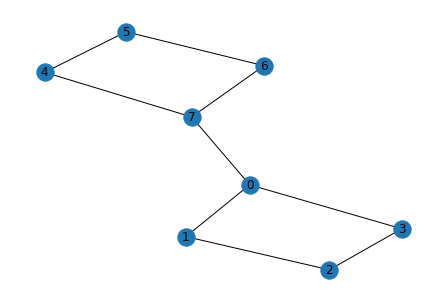

In [3]:
G=nx.Graph()
nx.add_cycle(G,[0,1,2,3])
nx.add_cycle(G,[4,5,6,7])
G.add_edge(0,7)
nx.draw(G,with_labels=True)

In [4]:
partition = [
    {1,2,3},
    {4,5,6},
    {0,7},]

In [5]:
nx.community.is_partition(G,partition)

True

In [10]:
partition_map={}
for idx,cluster_nodes in enumerate(partition):
    for node in cluster_nodes:
        partition_map[node]=idx

partition_map

{1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 0: 2, 7: 2}

In [11]:
partition_map[0]==partition_map[7]

True

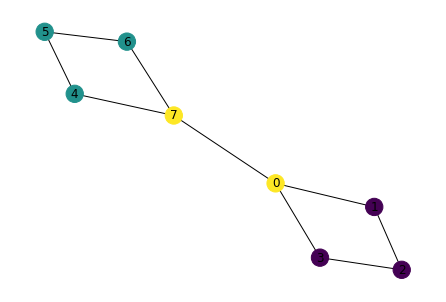

In [12]:
node_colors=[partition_map[n] for n in G.nodes]
nx.draw(G,node_color=node_colors,with_labels=True)

## 2. Modularity

In [15]:
def modularity(G,partition):
    W=sum(G.edges[v,w].get('weight',1) for v,w in G.edges)
    summ=0
    for cluster_nodes in partition:
        s_c=sum(G.degree(n,weight='weight') for n in cluster_nodes)
        C=G.subgraph(cluster_nodes)
        W_c=sum(C.edges[v, w].get('weight',1) for v,w in C.edges)
        summ+=W_c-s_c**2/(4*W)
    
    return summ/W

In [16]:
modularity(G,partition)

0.2222222222222222

In [17]:
partition2=[
    {0,1,2,3},
    {4,5,6,7},]
modularity(G,partition2)

0.3888888888888889

## 3. Zachary's Karate Club

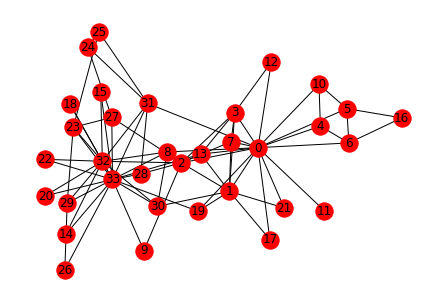

In [18]:
K=nx.karate_club_graph()
nx.draw(K,with_labels=True,node_color='red')

In [19]:
K.nodes[0]

{'club': 'Mr. Hi'}

In [20]:
K.nodes[9]

{'club': 'Officer'}

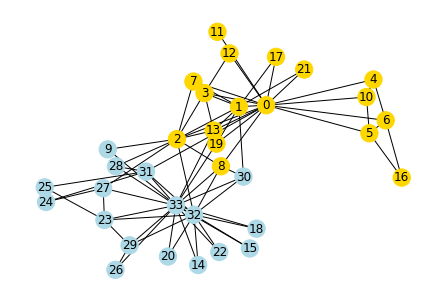

In [34]:
K=nx.karate_club_graph()
club_color={
    'Mr. Hi':'gold',
    'Officer':'lightblue',
}
node_colors=[club_color[K.nodes[n]['club']] for n in K.nodes]
nx.draw(K,node_color=node_colors,with_labels=True)

In [29]:
groups={
    'Mr. Hi':set(),
    'Officer':set(),}

for n in K.nodes:
    club=K.nodes[n]['club']
    groups[club].add(n)
groups

{'Mr. Hi': {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21},
 'Officer': {9,
  14,
  15,
  18,
  20,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33}}

In [30]:
empi_partition=list(groups.values())
empi_partition

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21},
 {9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]

In [31]:
nx.community.is_partition(K,empi_partition)

True

In [32]:
nx.community.quality.modularity(K,empi_partition)

0.3582347140039448

In [33]:
random_nodes=random.sample(K.nodes,17)
random_partition=[set(random_nodes),set(K.nodes)-set(random_nodes)]
random_partition

C:\Users\ahmed\AppData\Local\Temp/ipykernel_15532/4031735601.py:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes=random.sample(K.nodes,17)


[{0, 1, 5, 7, 8, 9, 10, 13, 14, 17, 18, 19, 20, 21, 22, 27, 28},
 {2, 3, 4, 6, 11, 12, 15, 16, 23, 24, 25, 26, 29, 30, 31, 32, 33}]

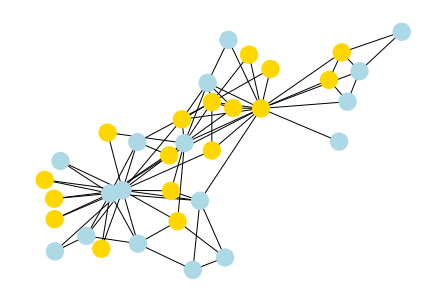

In [35]:
random_node_colors=['gold' if n in random_nodes else 'lightblue' for n in K.nodes]
nx.draw(K,node_color=random_node_colors)

In [36]:
nx.community.quality.modularity(K,random_partition)

-0.018080210387902723

## 4. Girvan-Newman clustering

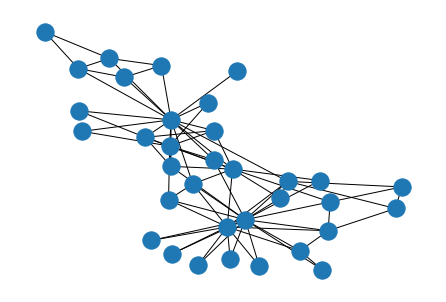

In [37]:
G=nx.karate_club_graph()
nx.draw(G)

In [38]:
nx.edge_betweenness_centrality(G)

{(0, 1): 0.025252525252525245,
 (0, 2): 0.0777876807288572,
 (0, 3): 0.02049910873440285,
 (0, 4): 0.0522875816993464,
 (0, 5): 0.07813428401663694,
 (0, 6): 0.07813428401663695,
 (0, 7): 0.0228206434088787,
 (0, 8): 0.07423959482783014,
 (0, 10): 0.0522875816993464,
 (0, 11): 0.058823529411764705,
 (0, 12): 0.04652406417112298,
 (0, 13): 0.04237189825425121,
 (0, 17): 0.04012392835922248,
 (0, 19): 0.045936960642843,
 (0, 21): 0.040123928359222474,
 (0, 31): 0.1272599949070537,
 (1, 2): 0.023232323232323233,
 (1, 3): 0.0077243018419489,
 (1, 7): 0.007422969187675069,
 (1, 13): 0.01240556828792123,
 (1, 17): 0.01869960105254222,
 (1, 19): 0.014633732280791102,
 (1, 21): 0.01869960105254222,
 (1, 30): 0.032280791104320514,
 (2, 3): 0.022430184194890075,
 (2, 7): 0.025214328155504617,
 (2, 8): 0.009175791528732704,
 (2, 9): 0.030803836686189627,
 (2, 13): 0.007630931160342923,
 (2, 27): 0.04119203236850296,
 (2, 28): 0.02278244631185807,
 (2, 32): 0.06898678663384543,
 (3, 7): 0.00336558

In [39]:
my_edge_betweenness=nx.edge_betweenness_centrality(G)
my_edge_betweenness[0,1]

0.025252525252525245

In [40]:
my_edge_betweenness.get((0,1))

0.025252525252525245

In [41]:
max(my_edge_betweenness,key=my_edge_betweenness.get)

(0, 31)

In [42]:
max(G.edges(),key=my_edge_betweenness.get)

(0, 31)

In [43]:
my_edge_betweenness=nx.edge_betweenness_centrality(G)
most_valuable_edge=max(G.edges(),key=my_edge_betweenness.get)
G.remove_edge(*most_valuable_edge)

In [44]:
list(nx.connected_components(G))

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33}]

In [49]:
G=nx.karate_club_graph()
partition_seq=[]
for _ in range(G.number_of_edges()):
    my_edge_betweenness=nx.edge_betweenness_centrality(G)
    most_valuable_edge=max(G.edges(),key=my_edge_betweenness.get)
    G.remove_edge(*most_valuable_edge)
    my_partition=list(nx.connected_components(G))
    partition_seq.append(my_partition)

In [55]:
len(partition_seq),nx.karate_club_graph().number_of_edges()

(78, 78)

In [56]:
len(partition_seq[0])

1

In [57]:
len(partition_seq[-1]),nx.karate_club_graph().number_of_nodes()

(34, 34)

In [59]:
G=nx.karate_club_graph()
modularity_seq=[modularity(G, p) for p in partition_seq]
modularity_seq

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.35996055226824464,
 0.35996055226824464,
 0.35996055226824464,
 0.348783694937541,
 0.348783694937541,
 0.348783694937541,
 0.348783694937541,
 0.3632478632478632,
 0.3632478632478632,
 0.3632478632478632,
 0.3632478632478632,
 0.3632478632478632,
 0.3632478632478632,
 0.4012984878369493,
 0.3925049309664694,
 0.3925049309664694,
 0.376232741617357,
 0.376232741617357,
 0.35831689677843515,
 0.35831689677843515,
 0.34171597633136086,
 0.34171597633136086,
 0.3247863247863247,
 0.3247863247863247,
 0.3159105851413542,
 0.3159105851413542,
 0.2986522024983562,
 0.2986522024983562,
 0.28040762656147256,
 0.28040762656147256,
 0.26282051282051266,
 0.26282051282051266,
 0.24753451676528584,
 0.24753451676528584,
 0.22682445759368833,
 0.22682445759368833,
 0.20890861275476658,
 0.20890861275476658,
 0.1898422090729783,
 0.18129520052596976,
 0.18129520052596976,
 0.18129520052596976,
 0.1600920447074293,
 0.1600920447074293,
 0

Text(0.5, 0, 'Algorithm step')

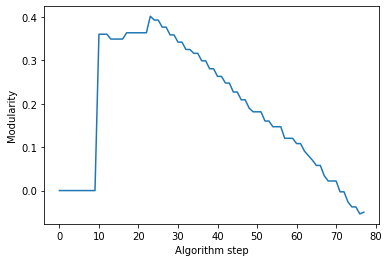

In [60]:
import matplotlib.pyplot as plt
plt.plot(modularity_seq)
plt.ylabel('Modularity')
plt.xlabel('Algorithm step')

In [61]:
best_partition=max(partition_sequence,key=nx.community.quality.modularity)

TypeError: modularity() missing 1 required positional argument: 'communities'

In [62]:
def my_modularity(partition):
    return nx.community.quality.modularity(G,partition)
best_partition=max(partition_sequence,key=my_modularity)

In [63]:
best_partition

[{0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
 {2, 24, 25, 27, 28, 31},
 {4, 5, 6, 10, 16},
 {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
 {9}]

In [64]:
def create_partition_map(partition):
    partition_map={}
    for idx,cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node]=idx
    return partition_map

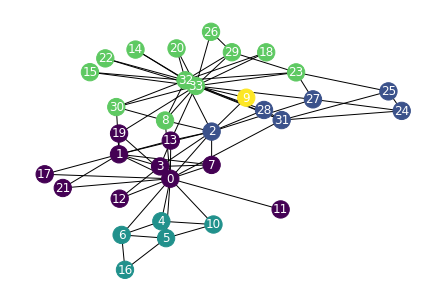

In [66]:
best_partition_map=create_partition_map(best_partition)
node_colors=[best_partition_map[n] for n in G.nodes()]
nx.draw(G,with_labels=True,node_color=node_colors,font_color='white')

In [67]:
nx.community.quality.modularity(G,best_partition)

0.40129848783694944

In [68]:
for partition in partition_sequence:
    if len(partition)==2:
        two_cluster_partition=partition
        break
two_cluster_partition

[{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]

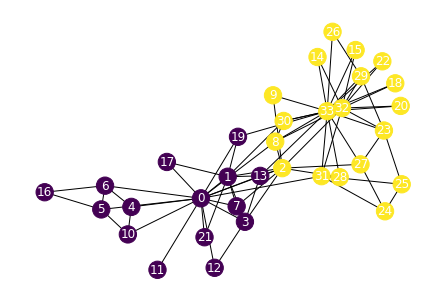

In [71]:
two_cluster_partition_map=create_partition_map(two_cluster_partition)
node_colors=[two_cluster_partition_map[n] for n in G.nodes()]
nx.draw(G,with_labels=True,node_color=node_colors,font_color='white')

In [72]:
nx.community.quality.modularity(G,two_cluster_partition)

0.3599605522682445

Text(0.5, 1.0, 'Actual communities')

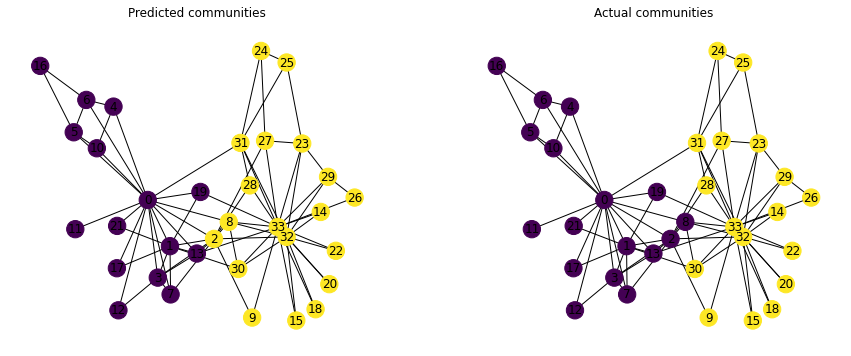

In [73]:
pos=nx.layout.spring_layout(G)
fig=plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
two_cluster_partition_map=create_partition_map(two_cluster_partition)
node_colors=[two_cluster_partition_map[n] for n in G.nodes()]
nx.draw(G,with_labels=True, node_color=node_colors, pos=pos)
plt.title('Predicted communities')

plt.subplot(1,2,2)
node_colors=[G.nodes[n]['club'] == 'Officer' for n in G.nodes()]
nx.draw(G,with_labels=True, node_color=node_colors, pos=pos)
plt.title('Actual communities')

In [74]:
list(nx.community.girvan_newman(G))[:5]

[({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
  {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}),
 ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
  {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
  {9}),
 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
  {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
  {4, 5, 6, 10, 16},
  {9}),
 ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
  {9}),
 ({0, 1, 3, 7, 12, 13, 17, 19, 21},
  {2, 24, 25, 27, 28, 31},
  {4, 5, 6, 10, 16},
  {8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33},
  {9},
  {11})]